In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

(53940, 10)


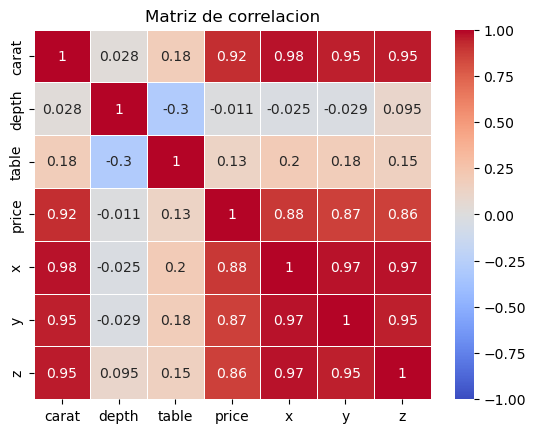

In [2]:
data = sns.load_dataset("diamonds")
#print(data.head())
#print(data.describe())
print(data.shape)


# matriz de correlación 
corr_matriz = data.corr(numeric_only=True)

# crear el mapa de calor
sns.heatmap(corr_matriz, annot=True, cmap="coolwarm", linewidths=0.7, vmin=-1, vmax=1)
plt.title("Matriz de correlacion")
plt.show()



In [3]:
x = data[["carat", "table"]]
y = data["price"]


#20% de los datos son de validación 
#80% de los datos son de entrenamiento 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print(type(y_test))

model = LinearRegression()
model.fit(x_train,y_train)
y_predic = model.predict(x_test)
r2_score = r2_score(y_test,y_predic)
recm = mean_squared_error(y_test,y_predic)**(1/2)


print("Coeficientes del modelo : ", model.coef_)
print("Punto de intercepción : ", model.intercept_)
print("R2 del modelo : ", r2_score)
print("Raiz del eror cuadratico medio : ", recm)




<class 'pandas.core.series.Series'>
Coeficientes del modelo :  [7832.79908924  -76.11549657]
Punto de intercepción :  2060.652253944507
R2 del modelo :  0.8503045156350835
Raiz del eror cuadratico medio :  1542.6219196578606


In [7]:
type(y_test)

pandas.core.series.Series

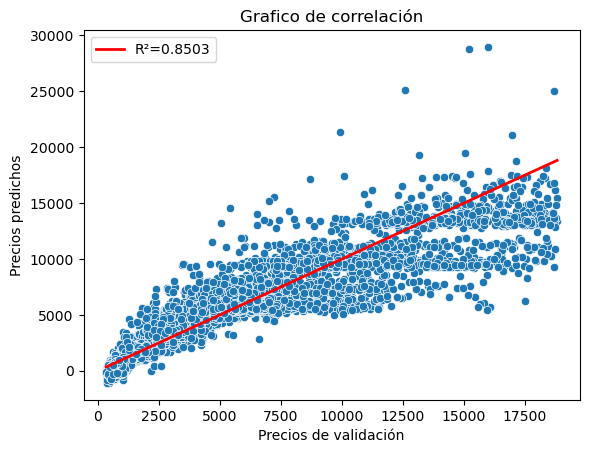

In [5]:

sns.scatterplot(x=y_test, y= y_predic)
line = [y_test.min(), y_test.max()]
plt.plot(line, line, color = "red", linewidth =2, label = f"R²={r2_score:.4f}")
plt.title("Grafico de correlación")
plt.xlabel("Precios de validación")
plt.ylabel("Precios predichos")
plt.legend()
